### PCA Visualizations

In [1]:
import numpy as np
from PIL import Image

import os
from glob import iglob
from sklearn.decomposition import PCA

In [2]:
test_images = [os.path.join("./data/KLGradesGANs/all_test/img", x) for x in os.listdir("data/KLGradesGANs/all_test/img")]
fake_images = list(iglob("LabeledResults/*/*"))

In [3]:
len(fake_images)

41639

In [4]:
fake_sample = np.random.choice(fake_images, len(test_images))

In [5]:
fake_images

['LabeledResults/3/2342.png',
 'LabeledResults/3/24150.png',
 'LabeledResults/3/21485.png',
 'LabeledResults/3/15463.png',
 'LabeledResults/3/25659.png',
 'LabeledResults/3/7730.png',
 'LabeledResults/3/1934.png',
 'LabeledResults/3/197.png',
 'LabeledResults/3/22291.png',
 'LabeledResults/3/7164.png',
 'LabeledResults/3/2871.png',
 'LabeledResults/3/3754.png',
 'LabeledResults/3/10547.png',
 'LabeledResults/3/2704.png',
 'LabeledResults/3/15644.png',
 'LabeledResults/3/28120.png',
 'LabeledResults/3/24417.png',
 'LabeledResults/3/28208.png',
 'LabeledResults/3/8002.png',
 'LabeledResults/3/7317.png',
 'LabeledResults/3/18307.png',
 'LabeledResults/3/21973.png',
 'LabeledResults/3/11206.png',
 'LabeledResults/3/7144.png',
 'LabeledResults/3/25482.png',
 'LabeledResults/3/5493.png',
 'LabeledResults/3/16981.png',
 'LabeledResults/3/9559.png',
 'LabeledResults/3/28156.png',
 'LabeledResults/3/15015.png',
 'LabeledResults/3/20705.png',
 'LabeledResults/3/13658.png',
 'LabeledResults/3/961

In [8]:
import regex as re
kl_re = re.compile("KL[0-4]{1}")
real_labels = [kl_re.findall(x)[0] for x in test_images if ".ipynb" not in x]
kl_re = re.compile("/([0-4]){1}/")
fake_labels = ["KL" + kl_re.findall(x)[0] for x in fake_sample if ".ipynb" not in x]

In [48]:
flattened_test = []
flattened_fake = []
for i in range(len(test_images)):
    real = np.array(Image.open(test_images[i])).flatten()
    fake = np.array(Image.open(fake_sample[i]).convert("L")).flatten()
    flattened_test.append(real)
    flattened_fake.append(fake)

In [51]:
flattened_test, flattened_fake = np.array(flattened_test), np.array(flattened_fake)
flattened_test, flattend_fake = flattened_test - np.average(flattened_test, axis=0), flattened_fake - np.average(flattened_fake, axis=0)

In [12]:
pca = PCA()

In [13]:
pca.fit_transform(flattened_test)

array([[-1.01196643e+04,  1.64753763e+03,  9.99734654e+02, ...,
        -4.37653982e-02,  1.09036645e-01,  4.95985617e-12],
       [-1.00816250e+04,  4.09566127e+03,  1.89482115e+03, ...,
        -7.14646905e-03,  1.68642326e-01,  4.95985617e-12],
       [-3.26797030e+03, -6.50256499e+02, -5.50763084e+02, ...,
        -2.79164050e-01, -2.17496808e-02,  4.95985617e-12],
       ...,
       [-1.25880373e+03,  1.35965570e+03, -1.16367724e+03, ...,
         1.07683821e-03,  3.53794739e-01,  4.95985617e-12],
       [-8.75175256e+03,  4.07437457e+02,  3.14184577e+03, ...,
         9.22442964e-01, -2.06760724e-01,  4.95985617e-12],
       [-1.59871671e+03,  2.47614671e+03, -1.93346927e+03, ...,
        -1.93431909e-01, -1.25468890e-01,  4.95985617e-12]])

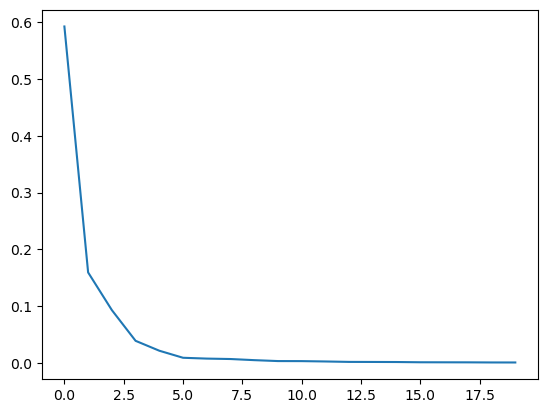

In [14]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_[:20])

In [15]:
np.sum(pca.explained_variance_ratio_[:10])

0.9389451061511561

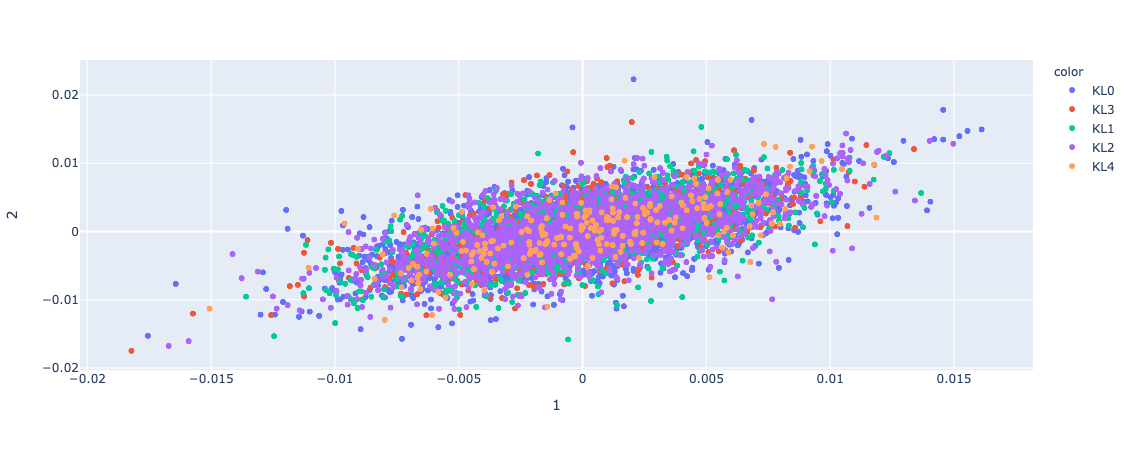

In [99]:
import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter(pca.components_, x=1, y=2, color=real_labels)
fig.show()

In [95]:
pca_fake = PCA()
pca_fake.fit_transform(flattened_fake)

array([[ 4.00588379e+03,  5.46876891e+03, -4.61124789e+03, ...,
         1.28075148e-21,  7.07275756e-21,  8.02973023e-23],
       [ 7.78326299e+03, -7.12530148e+02,  2.49029499e+03, ...,
         1.28075148e-21,  7.07275755e-21,  8.02973068e-23],
       [ 7.85926362e+03, -3.61759271e+02, -3.96814625e+03, ...,
         1.28075148e-21,  7.07275757e-21,  8.02972892e-23],
       ...,
       [ 1.24296285e+03,  8.64164945e+02,  4.77352957e+01, ...,
         1.28075149e-21,  7.07275754e-21,  8.02973008e-23],
       [-2.80623513e+03, -2.67526489e+03, -1.37339923e+03, ...,
         1.28075149e-21,  7.07275756e-21,  8.02972973e-23],
       [-1.22192366e+03,  5.08702912e+03, -3.15925043e+03, ...,
         1.28075149e-21,  7.07275756e-21,  8.02972951e-23]])

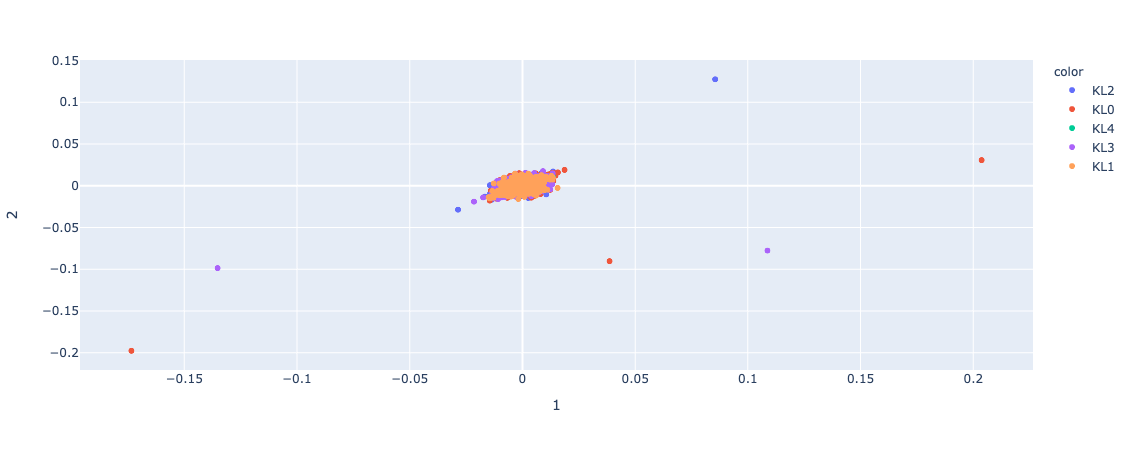

In [100]:
import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_fake.explained_variance_ratio_ * 100)
}

fig = px.scatter(pca_fake.components_, x=1, y=2, color=fake_labels)
fig.show()

In [54]:
pca.components_.shape


(7343, 50176)

In [64]:
stacked = np.vstack((pca.components_, pca_fake.components_))

In [65]:
stacked.shape

(14686, 50176)

In [66]:
ds_labels = ["Real"]*7343 + ["Fake"]*7343

In [70]:
import plotly.graph_objects as go

In [85]:
pca_stacked = PCA()
pca_stacked.fit_transform(stacked)

array([[ 9.93426286e-01,  6.42964565e-02, -7.23556966e-03, ...,
         8.65489997e-05,  2.15344241e-03,  1.85610077e-17],
       [ 9.47471534e-02, -9.03821307e-01,  1.21886355e-01, ...,
         2.34825701e-03, -7.20963763e-04,  1.85610077e-17],
       [-6.93497566e-03,  7.76491820e-02,  9.61086948e-01, ...,
        -1.94629204e-03, -8.95537162e-04,  1.85610077e-17],
       ...,
       [-1.58848576e-06, -5.01028674e-05, -9.29455762e-06, ...,
        -1.61117430e-07,  2.44123628e-08,  1.85610077e-17],
       [-1.88016084e-05, -1.60923467e-05,  1.82872063e-05, ...,
        -2.68767319e-08,  1.99899786e-08,  1.85610077e-17],
       [-2.26952308e-05,  1.88715843e-05,  3.46199728e-05, ...,
         1.34018131e-07,  9.93791068e-08,  1.85610077e-17]])

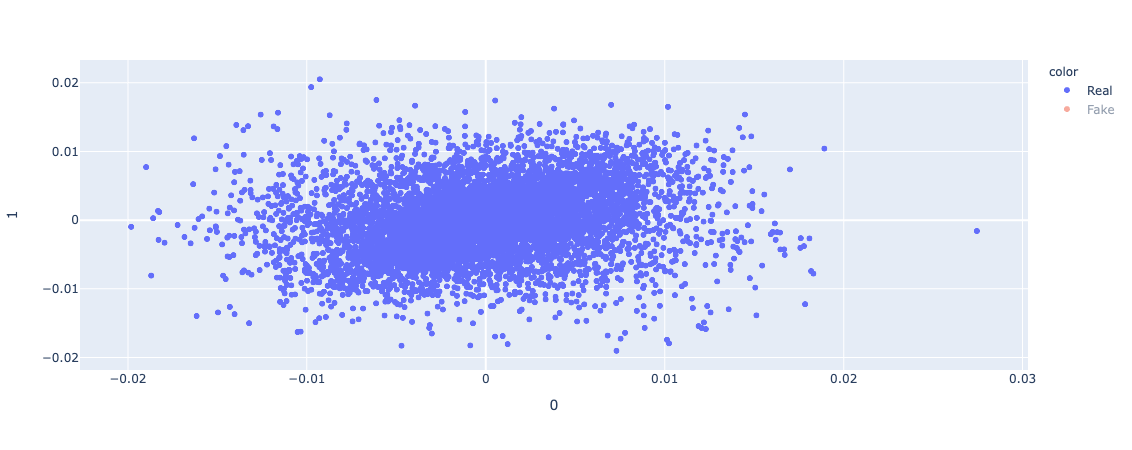

In [92]:
import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter(pca_stacked.components_, x=0, y=1
                 , color=ds_labels)
fig.show()

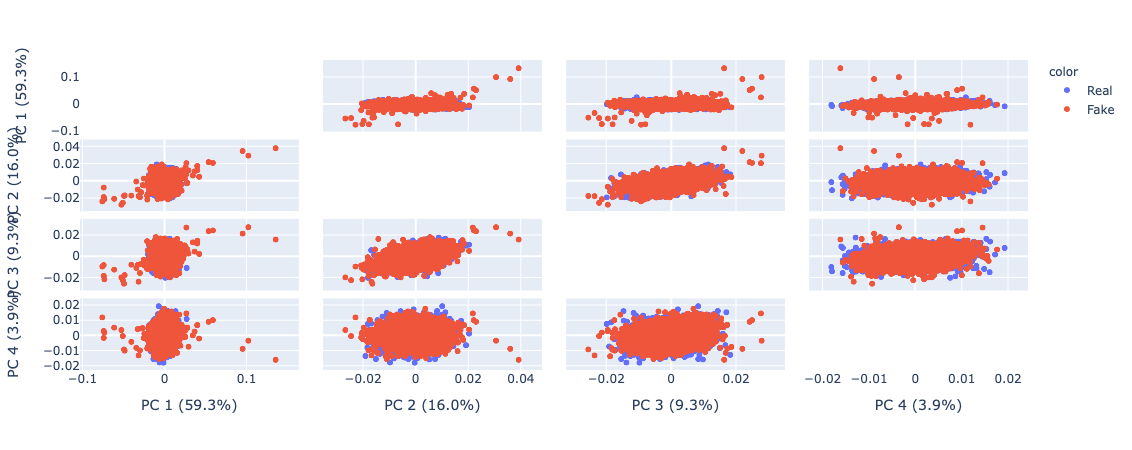

In [89]:
fig = px.scatter_matrix(
    pca_stacked.components_,
    labels=labels,
    dimensions=range(4),
    color=ds_labels
)
fig.update_traces(diagonal_visible=False)
fig.show()